### 지도학습 - 분류모델 추가 학습 문제1
- 신용카드 사기 거래 탐지
- 신용카드 사기 거래 탐지는 이진 분류 문제로, 주어진 거래가 정상인지 사기인지 예측
- LogisticRegression 알고리즘 이용
- Credit Card Fraud Detection  데이터 셋 사용

- 구현 가이드

    - **데이터 로드**: 신용카드 거래 데이터셋을 로드
    - **특성과 레이블 분리**: 'Class' 열은 거래의 레이블(정상: 0, 사기: 1)을 나타내며, 이를 제외한 나머지 열은 특성으로 사용
    - **데이터 분할**: 데이터를 학습 세트와 테스트 세트로 분할하여 모델의 성능을 평가
    - **데이터 스케일링**: 특성 값의 범위를 표준화
    - **모델 학습**: 랜덤 포레스트 분류기를 사용하여 학습 세트에 대해 모델을 학습
    - **예측 및 평가**: 테스트 세트에 대한 예측을 수행하고, 정확도와 기타 평가 지표를 출력

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# 데이터 가져오기
df = pd.read_csv('creditcard.csv')

#결측치 확인
print(df.isnull().sum().sum())

#열 확인
print(df.columns)

0
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
#특성과 레이블 분리
X = df.drop(columns='Class') #특성
y = df['Class'] #타깃

In [5]:
#데이터 분할 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2, 
    random_state=42)


In [6]:
#데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [14]:
#분류 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),   # 로지스틱 회귀
     "Random Forest": RandomForestClassifier(),                  # 랜덤 포레스트
}

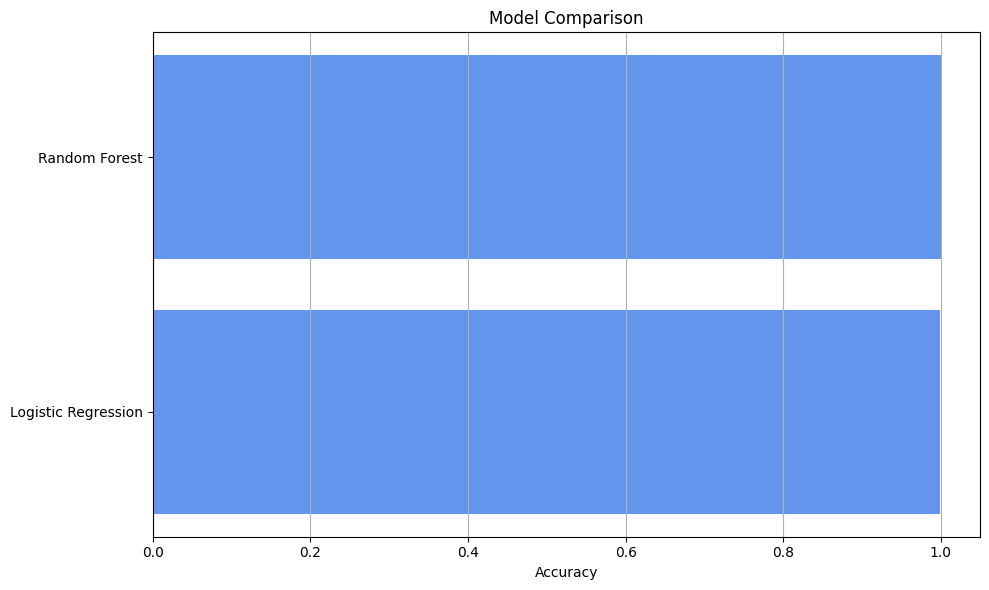

                 Model  Accuracy
1        Random Forest  0.999614
0  Logistic Regression  0.999087


In [15]:
# 모델 학습 -> 평가
results = []  
for name, model in models.items():
    model.fit(X_train_scaled, y_train)               # 모델 학습
    y_pred = model.predict(X_test_scaled)            # 테스트 데이터로 예측
    acc = accuracy_score(y_test, y_pred)             # 정확도 계산
    results.append({'Model': name, 'Accuracy': acc}) # 결과 저장

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='cornflowerblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.gca().invert_yaxis()  
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(results_df)